In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Muograms

In [2]:
def get_data(path):
    data_list = sorted(os.listdir(path)) # Data names list
    data = np.array([np.loadtxt(path+'/'+data, comments = '#') for data in data_list]) # Read data
    return data, data_list

In [3]:
path = '/home/kevin/Documentos/muograms3'
data, data_list = get_data(path)
print(data.shape)

(42, 100, 100)


In [4]:
cenit = np.linspace(20, -8,5)
azimut = np.linspace(-50,50,5)

In [5]:
def plot_muograms(muograms,cenit,azimut,data_list,nrows,ncols,save=False,axis=True):
    
    plt.figure(figsize=(ncols*3,nrows*3))
    plt.rcParams.update({'font.size': 16})
    
    for i in range(len(muograms)):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(muograms[i],cmap='jet')
        plt.clim(0,np.max(muograms))
        #plt.xticks(range(muograms.shape[2])[::20],np.round(np.unique(azimut)[::20],2))
        plt.xticks(np.linspace(0,99,5),np.round(azimut,2))
        plt.xlabel(r'$\Theta_x$ [degree]')
        #plt.yticks(range(muograms.shape[1])[::20],np.round(np.unique(cenit)[::20],2))
        plt.yticks(np.linspace(0,99,5),np.round(cenit,2))
        plt.ylabel(r'$\Theta_y$ [degree]')
        #plt.colorbar(shrink=0.9,label='D [m]')
        if not axis:
            plt.axis('off')
        
        #plt.title(data_list[i])
    if save:
        plt.savefig('CMmuograms.eps',format='eps')

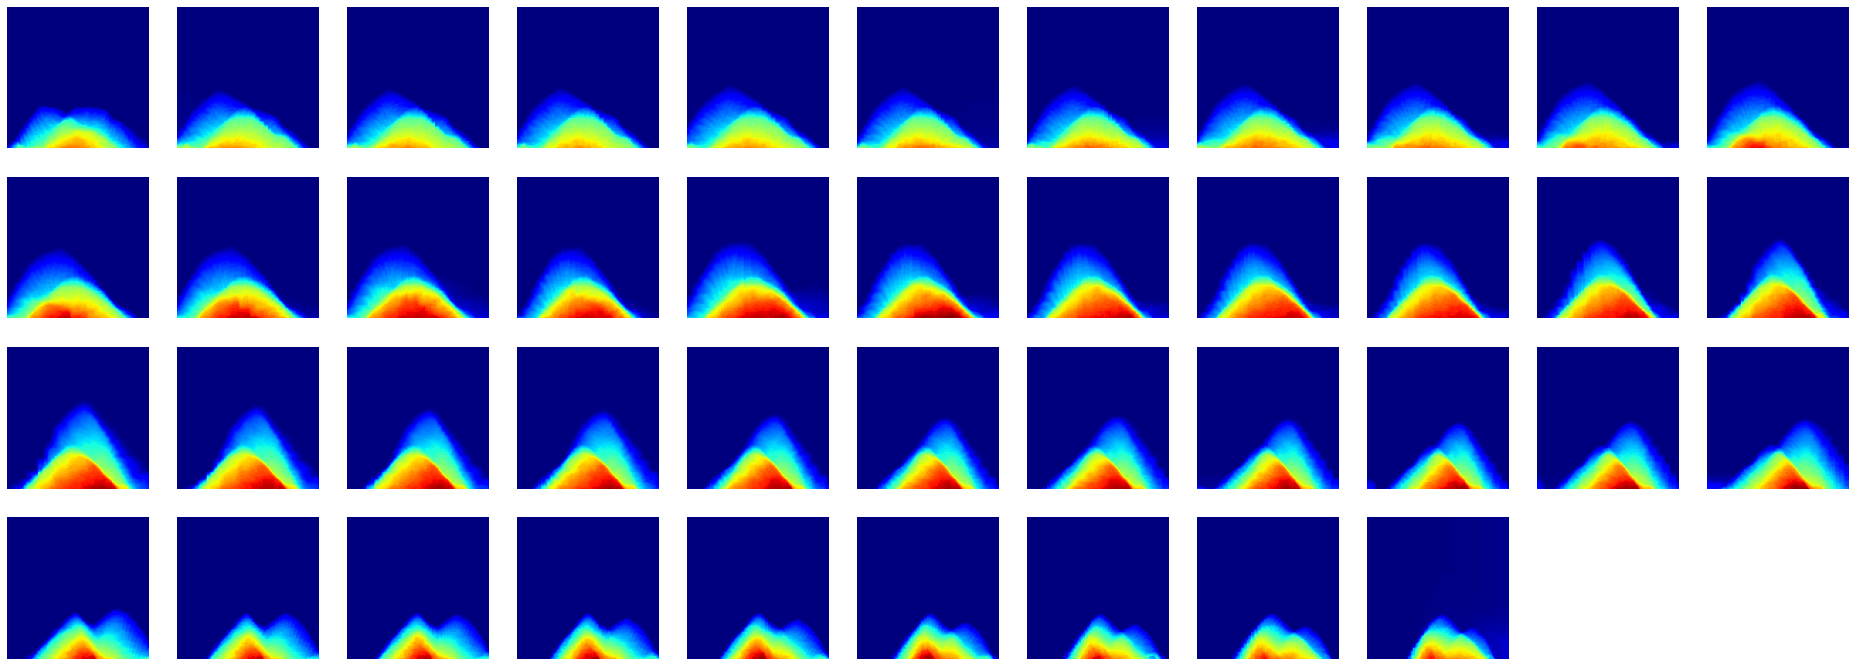

In [6]:
plot_muograms(data,cenit,azimut,data_list,4,11,save=False,axis=False)

## Coordinates

In [7]:
def get_coords(path):
    return np.loadtxt(path)

In [8]:
points = get_coords('/home/kevin/coordinates5.dat')
print(points.shape)

(42, 2)


In [9]:
refpoint = [4.48666667,-75.38878788]

In [10]:
points2 = np.insert(points,0,np.array([refpoint]),axis=0)

In [11]:
def plot_detector_coords(coords,data_names,show_names=True,save=False,axis=True,heightmap=False):
    if heightmap:
        axis = False
        # Normalization to fit in heightmap
        coords[:,0] = (coords[:,0] - 4.5) / (4.47 - 4.5)*100
        coords[:,1] = (coords[:,1] - (-75.4)) / ((-75.37) - (-75.4))*100

    colors = np.ones(len(coords))+1
    colors[0] = 0 # Reference point
    #colors[1] = 0 # Reference point
    colors = colors.astype('int32')
    colormap = np.array(['b','r','g'])
    plt.figure(figsize=(10,10))
    plt.scatter(coords[:,1],coords[:,0],c=colormap[colors])
    if show_names:
        for i in range(coords.shape[0]-1):
            plt.text(coords[i+1,1],coords[i+1,0],data_names[i],fontsize=8)
    plt.xlabel('long')
    plt.ylabel('lat')
    #plt.title('Observation point positions')
    if axis:
        plt.axis([-1.1,1.1,-1.1,1.1])
        plt.axis('off')
    if save:
        plt.savefig('CMcoords.svg',format='svg')

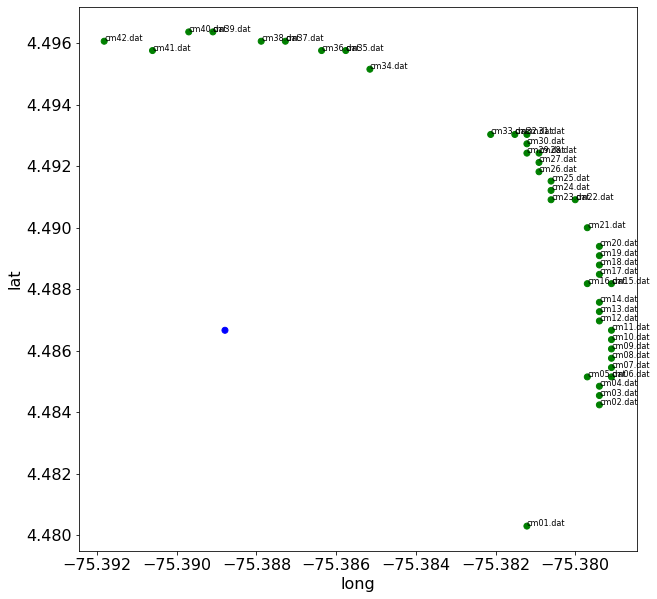

In [12]:
plot_detector_coords(points2,data_list,axis=False)

<Figure size 720x720 with 0 Axes>

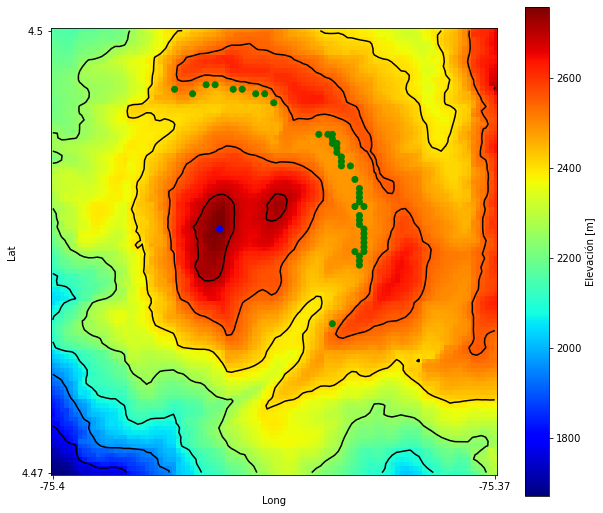

In [14]:
heightmap = np.loadtxt('/home/kevin/heightmap.dat')
#heightmap[heightmap<2485]=2485
#heightmap = (heightmap - np.min(heightmap)) / (np.max(heightmap) - np.min(heightmap)) # Normalization
plt.figure(figsize=(10,10))
plot_detector_coords(points2,data_list,show_names=False,heightmap=True)
plt.imshow(heightmap,cmap='jet')
plt.yticks([0,100-1],np.linspace(4.5,4.47,2))
plt.ylabel('Lat')
plt.xticks([0,100-1],np.linspace(-75.4,-75.37,2))
plt.xlabel('Long')
#plt.axis([10,72,75,10])
#plt.axis('off')
plt.colorbar(shrink=0.9,label='Elevación [m]')
plt.contour(heightmap,colors='k')
plt.savefig('heightmap.svg',format='svg')

### angles

In [13]:
def get_angles(points):
    return np.array([np.arctan2((point - points[0])[0],(point - points[0])[1])-(np.pi/2) for point in points[1:]])

In [14]:
angles = get_angles(points2)
print(angles.shape,angles*180/np.pi)

(42,) [-130.03026637 -104.47033653 -102.72440061 -100.95411005  -99.46231199
  -98.88065014  -97.12500908  -95.35581955  -93.5763307   -91.78990876
  -90.          -88.1523917   -86.30861793  -84.4724657   -81.11934986
  -80.53768801  -79.04594874  -77.27565742  -75.52972066  -73.81081007
  -69.86371694  -64.2306979   -62.59245318  -60.94542563  -59.34936276
  -56.82152165  -55.3048805   -53.8418492   -52.76520245  -51.34022864
  -49.96977798  -48.81411388  -46.33226278  -23.19856606  -18.43492992
  -14.93140149   -9.16233746   -5.5275343     1.78990876    5.35581955
   11.30992035   17.87867878]


### How tomopy place the points

In [15]:
def create_points(R,angles):
    return np.insert(np.array([R*np.cos(angles),R*np.sin(angles)]),0,np.array([0,0]),axis=1).T

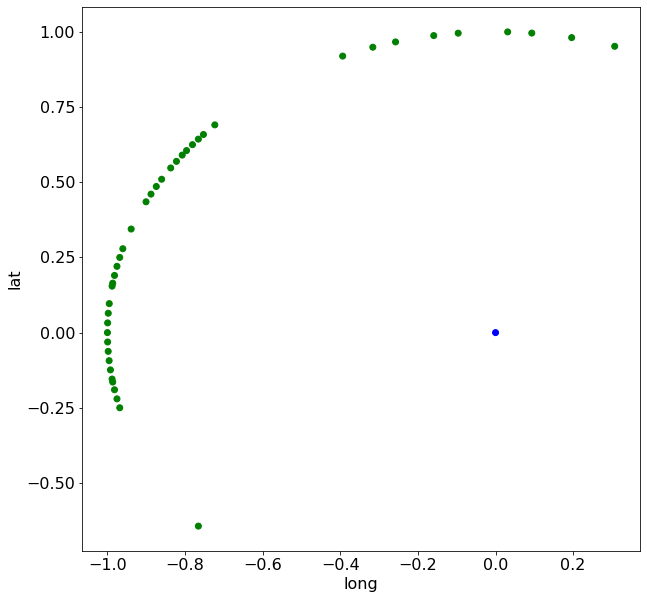

In [16]:
p = create_points(1,angles)
#p = (p - np.min(p)) / (np.max(p) - np.min(p))
#p[:,0] = p[:,0]*(np.max(points[:,0])-np.min(points[:,0])) + np.min(points[:,0])
#p[:,1] = (p[:,1]*(np.max(points[:,1])-np.min(points[:,1])) + np.min(points[:,1])) - 0.002
plot_detector_coords(p,data_list,show_names=False,axis=False)

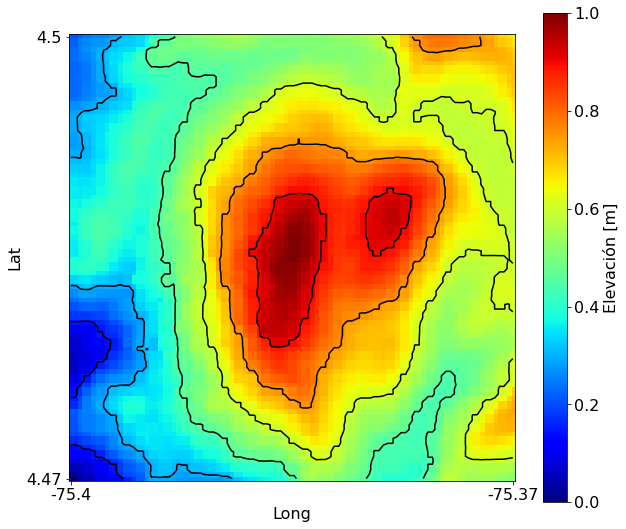

In [18]:
heightmap = np.loadtxt('/home/kevin/heightmap2.dat')
heightmap = (heightmap - np.min(heightmap)) / (np.max(heightmap) - np.min(heightmap)) # Normalization
plt.figure(figsize=(10,10))
#plot_detector_coords(p,data_list,show_names=True,heightmap=True)
plt.imshow(heightmap,cmap='jet')
plt.yticks([0,100-1],np.linspace(4.5,4.47,2))
plt.ylabel('Lat')
plt.xticks([0,100-1],np.linspace(-75.4,-75.37,2))
plt.xlabel('Long')
plt.colorbar(shrink=0.9,label='Elevación [m]')
plt.contour(heightmap,colors='k')

## Reconstruction

In [19]:
import tomopy
rec = tomopy.recon(data,angles,algorithm='art')

In [20]:
rec[rec<0]=0 # Remove negative values (values where reconstruction doesn't happen)
rec.shape

(100, 100, 100)

In [21]:
recZ = np.sum(rec,axis=0)
recZ_norm = (recZ - np.min(recZ)) / (np.max(recZ) - np.min(recZ)) # normalization between 0 and 1

### Reconstruction region estimation

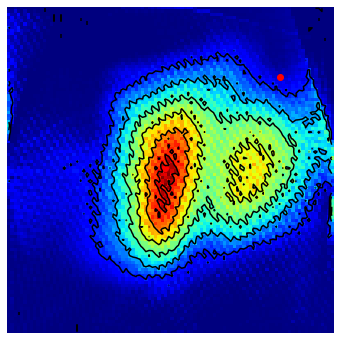

In [22]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6,6))
plt.imshow(recZ_norm,cmap='jet')
#plt.colorbar(shrink=0.8)
plt.scatter([83,48],[21,49],c='r')
#plt.title('Reconstrucción Cerro Machín')
plt.yticks([0,100-1],np.linspace(4.495,4.477,2))
plt.ylabel('Lat')
plt.xticks([0,100-1],np.linspace(-75.398,-75.379,2))
plt.xlabel('Long')
plt.axis('off')
plt.contour(recZ_norm,colors='k')
#plt.savefig('recCM4.svg',format='svg')

In [98]:
np.where(abs(recZ)<0.05) #finding known coordinate in region

(array([21]), array([83]))

In [238]:
abs(angles+get_angles(np.array([[49,48],[21,83]]))).argmin()

29

In [126]:
angles[29]*180/np.pi

-51.34022863879021

In [136]:
points2[0]

array([44.44443333, 37.37373333])

In [138]:
points[29]

array([  4.49272727, -75.38121212])

In [144]:
dpy=abs(refpoint[0]-points[29][0])/abs(49-21) # pixel-to-pixel distance
dpx=abs(refpoint[1]-points[29][1])/abs(48-83)
print(dpy,dpx)

0.0002164499999999871 0.0002164502857141315


In [150]:
print((dpy*21)+points[29][0],points[29][0]-(dpy*79)) # latitude region estimation

4.49727272 4.47562772


In [151]:
print((dpx*17)+points[29][1],points[29][1]-(dpx*83)) # longitude region estimation

-75.37753246514286 -75.39917749371428


### Error estimation

In [34]:
heightmap2 = np.loadtxt('/home/kevin/heightmap2.dat')
heightmap2[heightmap2<2485]=2485 # Remove heights lower than Po height
heightmap2 = (heightmap2 - np.min(heightmap2)) / (np.max(heightmap2) - np.min(heightmap2)) # Normalize
#heightmap2[0:10,:]=0
#heightmap2[:,89:100]=0

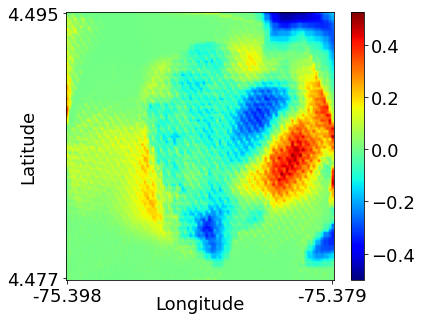

In [35]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(6,6))
plt.imshow(recZ_norm-heightmap2,cmap='jet')
plt.yticks([0,100-1],np.linspace(4.495,4.477,2))
plt.ylabel('Latitude',labelpad=-30)
plt.xticks([0,100-1],np.linspace(-75.398,-75.379,2))
plt.xlabel('Longitude',labelpad=-10)
plt.colorbar(shrink=0.82)
#plt.contour(recZ_norm-heightmap2,colors='k')
#plt.savefig('ErrorSup.eps',format='eps', bbox_inches='tight')

0.009745953710162231 0.525170087814331 -0.49949761600175624


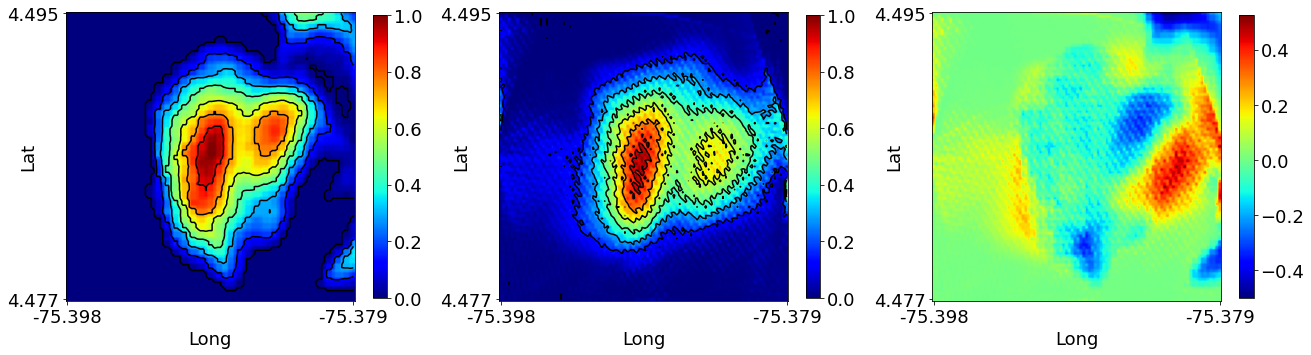

In [36]:
plt.figure(figsize=(22,8))
plt.subplot(1,3,1)
plt.imshow(heightmap2,cmap='jet')
plt.yticks([0,100-1],np.linspace(4.495,4.477,2))
plt.ylabel('Lat',labelpad=-30)
plt.xticks([0,100-1],np.linspace(-75.398,-75.379,2))
plt.xlabel('Long')
plt.colorbar(shrink=0.65)
plt.contour(heightmap2,colors='k')
#plt.title('Original')
plt.subplot(1,3,2)
#plt.title('Reconstruction')
plt.imshow(recZ_norm,cmap='jet')
plt.yticks([0,100-1],np.linspace(4.495,4.477,2))
plt.xticks([0,100-1],np.linspace(-75.398,-75.379,2))
plt.ylabel('Lat',labelpad=-30)
plt.xlabel('Long')
plt.colorbar(shrink=0.65)
plt.contour(recZ_norm,colors='k')
plt.subplot(1,3,3)
plt.imshow((recZ_norm-heightmap2),cmap='jet')
plt.colorbar(shrink=0.65)
plt.yticks([0,100-1],np.linspace(4.495,4.477,2))
plt.ylabel('Lat',labelpad=-30)
plt.xticks([0,100-1],np.linspace(-75.398,-75.379,2))
plt.xlabel('Long')
#plt.savefig('ErrorSup.eps',format='eps')
print(np.mean(recZ_norm-heightmap2),np.max((recZ_norm-heightmap2)),np.min((recZ_norm-heightmap2)))

(9959,)
mean: 0.009786076624321948, std: 0.1261172434083719 


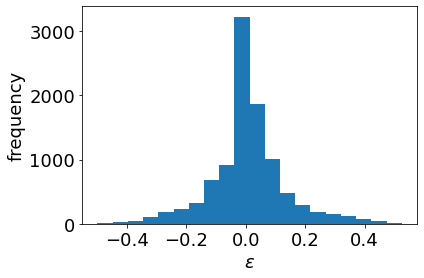

In [64]:
sys = (recZ_norm-heightmap2)
sys = sys[sys!=0]
#sys = sys[(sys>=0.0097) | (sys<=-0.0097)]
print(sys.shape)
plt.hist(sys,20)
plt.xlabel(r'$\epsilon$')
plt.ylabel('frequency')
print(f'mean: {np.mean(sys)}, std: {np.std(sys)} ')
#plt.savefig('ErrorSupHist.eps',format='eps', bbox_inches='tight')

In [88]:
from sklearn.metrics import mean_squared_error
mean_squared_error(heightmap2,recZ_norm)**(1/2)

0.1262367654150845

### Other views can be compared with muograms

In [28]:
recX = np.sum(rec,axis=1)/1000
recX = recX[50:,20:]
recX_norm = (recX - np.min(recX)) / (np.max(recX) - np.min(recX)) # normalization between 0 and 1

In [29]:
muogram0 = data[-4][50:,20:]/1000
muogram0_norm = (muogram0 - np.min(muogram0)) / (np.max(muogram0) - np.min(muogram0)) # normalization between 0 and 1

In [173]:
cenit2 = np.linspace(6, -8,3)
azimut2 = np.linspace(-30,50,4)

0.1263853492813457 0.3719887374966421 -0.24271713986358745


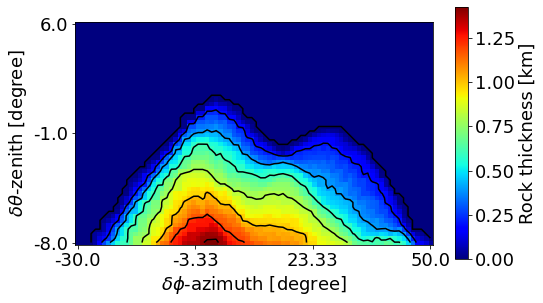

In [145]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,8))
plt.imshow(muogram0,cmap='jet')
plt.xticks(np.linspace(0,79,4),np.round(azimut2,2))
plt.xlabel(r'$\delta\phi$-azimuth [degree]')
plt.yticks(np.linspace(0,49,3),np.round(cenit2,2))
plt.ylabel(r'$\delta\theta$-zenith [degree]')
plt.colorbar(shrink=0.58,label='Rock thickness [km]')
plt.contour(muogram0,colors='k')
plt.savefig('OriFront.eps',format='eps', bbox_inches='tight')
print(np.mean(recX-muogram0),np.max(recX-muogram0),np.min(recX-muogram0))

0.1263853492813457 0.3719887374966421 -0.24271713986358745


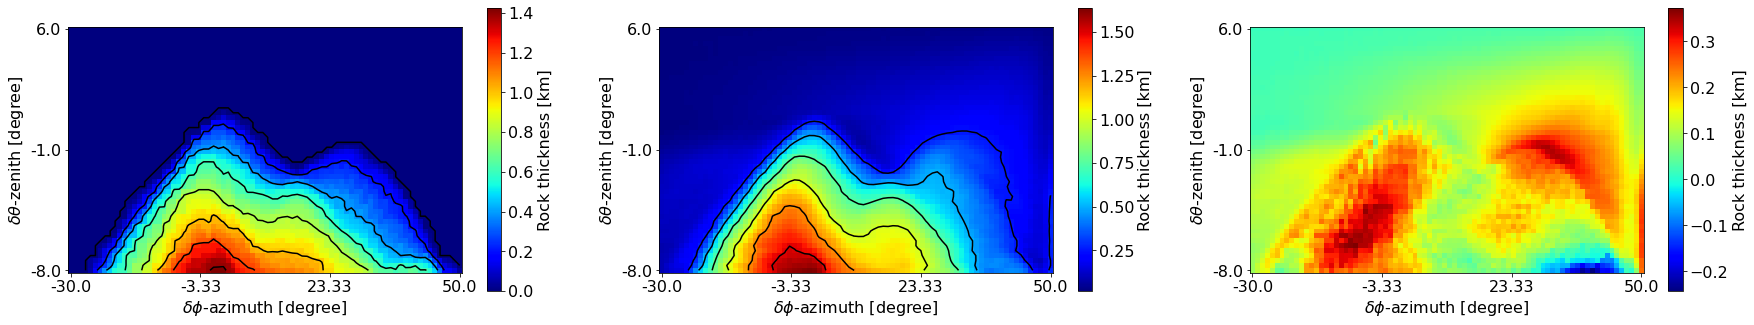

In [176]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(muogram0,cmap='jet')
plt.xticks(np.linspace(0,79,4),np.round(azimut2,2))
plt.xlabel(r'$\delta\phi$-azimuth [degree]')
plt.yticks(np.linspace(0,49,3),np.round(cenit2,2))
plt.ylabel(r'$\delta\theta$-zenith [degree]')
plt.colorbar(shrink=0.65,label='Rock thickness [km]')
plt.contour(muogram0,colors='k')
#plt.title('Original')
plt.subplot(1,3,2)
#plt.title('Reconstruction')
plt.imshow(recX,cmap='jet')
plt.xticks(np.linspace(0,79,4),np.round(azimut2,2))
plt.xlabel(r'$\delta\phi$-azimuth [degree]')
plt.yticks(np.linspace(0,49,3),np.round(cenit2,2))
plt.ylabel(r'$\delta\theta$-zenith [degree]')
plt.colorbar(shrink=0.65,label='Rock thickness [km]')
plt.contour(recX,colors='k')
plt.subplot(1,3,3)
plt.imshow(recX-muogram0,cmap='jet')
plt.xticks(np.linspace(0,79,4),np.round(azimut2,2))
plt.xlabel(r'$\delta\phi$-azimuth [degree]')
plt.yticks(np.linspace(0,49,3),np.round(cenit2,2))
plt.ylabel(r'$\delta\theta$-zenith [degree]')
plt.colorbar(shrink=0.65,label='Rock thickness [km]')
#plt.title('Error')
plt.savefig('ErrorFront.svg',format='svg')
print(np.mean(recX-muogram0),np.max(recX-muogram0),np.min(recX-muogram0))

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(muogram0,recX)**(1/2)

0.15215256502270783

(2327,)
mean: 0.18205778265993686, std: 0.06279679729048783 


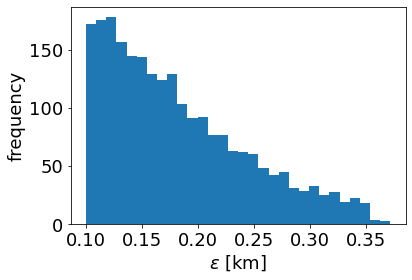

In [87]:
sys = (recX-muogram0)
#sys = sys[sys!=0]
sys = sys[sys>=0.1]
print(sys.shape)
plt.hist(sys.flatten(),30)
plt.xlabel(r'$\epsilon$ [km]')
plt.ylabel('frequency')
print(f'mean: {np.mean(sys)}, std: {np.std(sys)} ')
plt.savefig('ErrorFrontHist.eps',format='eps', bbox_inches='tight')

In [30]:
recY = np.sum(rec,axis=2)/1000
recY = recY[40:]
recY_norm = (recY - np.min(recY)) / (np.max(recY) - np.min(recY)) # normalization between 0 and 1

In [31]:
muogram90 = data[11][40:]/1000
muogram90_norm = (muogram90 - np.min(muogram90)) / (np.max(muogram90) - np.min(muogram90)) # normalization between 0 and 1

In [177]:
cenit3 = np.linspace(8.8, -8,3)
azimut3 = np.linspace(-50,50,5)

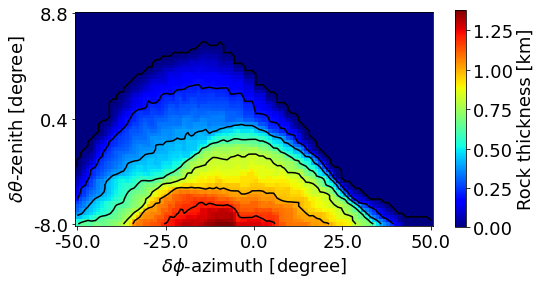

In [178]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,8))
plt.imshow(muogram90,cmap='jet')
plt.xticks(np.linspace(0,99,5),np.round(azimut3,2))
plt.xlabel(r'$\delta\phi$-azimuth [degree]')
plt.yticks(np.linspace(0,59,3),np.round(cenit3,2))
plt.ylabel(r'$\delta\theta$-zenith [degree]')
plt.colorbar(shrink=0.5,label='Rock thickness [km]')
plt.contour(muogram90,colors='k')
#plt.savefig('OriFront.eps',format='eps', bbox_inches='tight')
#print(np.mean((-data[-4][50:,20:]/1000+recX[50:,20:]/1000)),np.max((-data[-4][50:,20:]/1000+recX[50:,20:]/1000)),np.min((-data[-4][50:,20:]/1000+recX[50:,20:]/1000)))

0.10638807026110193 0.5176067098546662 -0.5940666499541565


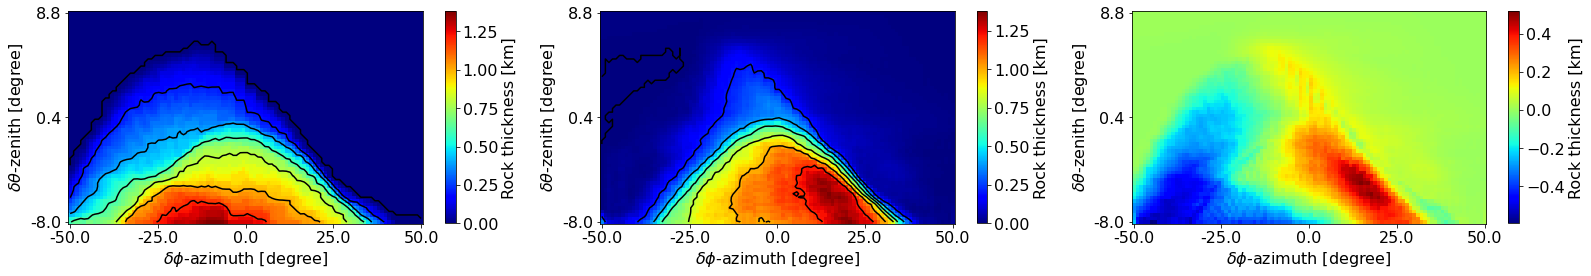

In [182]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(27,6))
plt.subplot(1,3,1)
plt.imshow(muogram90,cmap='jet')
plt.xticks(np.linspace(0,99,5),np.round(azimut3,2))
plt.xlabel(r'$\delta\phi$-azimuth [degree]')
plt.yticks(np.linspace(0,59,3),np.round(cenit3,2))
plt.ylabel(r'$\delta\theta$-zenith [degree]')
plt.colorbar(shrink=0.65,label='Rock thickness [km]')
plt.contour(muogram90,colors='k')
#plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(recY,cmap='jet')
plt.xticks(np.linspace(0,99,5),np.round(azimut3,2))
plt.xlabel(r'$\delta\phi$-azimuth [degree]')
plt.yticks(np.linspace(0,59,3),np.round(cenit3,2))
plt.ylabel(r'$\delta\theta$-zenith [degree]')
plt.colorbar(shrink=0.65,label='Rock thickness [km]')
plt.contour(recY,colors='k')
#plt.title('Reconstruction')
plt.subplot(1,3,3)
plt.imshow((recY-muogram90),cmap='jet')
plt.xticks(np.linspace(0,99,5),np.round(azimut3,2))
plt.xlabel(r'$\delta\phi$-azimuth [degree]')
plt.yticks(np.linspace(0,59,3),np.round(cenit3,2))
plt.ylabel(r'$\delta\theta$-zenith [degree]')
plt.colorbar(shrink=0.65,label='Rock thickness [km]')
#plt.title('Error')
#plt.savefig('ErrorLat.svg',format='svg')
print(np.mean(abs(recY-muogram90)),np.max(recY-muogram90),np.min(recY-muogram90))

In [171]:
from sklearn.metrics import mean_squared_error
mean_squared_error(muogram90,recY)**(1/2)

0.17105152522925862

(2014,)
mean: -0.06437288964203913, std: 0.28337502962139416 


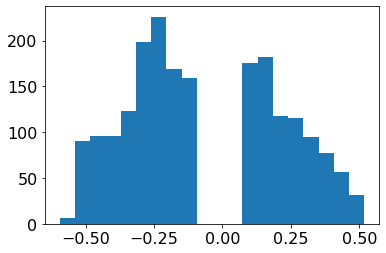

In [184]:
sys = (recY-muogram90)
#sys = sys[sys!=0]
sys = sys[(sys>=0.1) | (sys<=-0.1)]
print(sys.shape)
plt.hist(sys,20)
print(f'mean: {np.mean(sys)}, std: {np.std(sys)} ')

### save gif of slices

In [187]:
cross_section_sum = np.zeros([100,100])
for i in range(100):
    cross_section_sum += rec[:,i,:]
    #plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(12,12))
    plt.imshow(cross_section_sum,cmap='jet')
    plt.clim(0,np.max(recX))
    plt.colorbar(shrink=0.9, label='D[m]')
    # gif
    plt.savefig(f'recx/{i+1:003}.png')
    plt.close()

In [188]:
import imageio
with imageio.get_writer('recx/recx.gif', mode='I') as writer:
    for filename in sorted(os.listdir('recx')):
        image = imageio.imread('recx/'+filename)
        writer.append_data(image)

## Variation of number of points and iterations

DEscripción...

In [90]:
points4 = np.array([points2[0],points2[1],points2[11],points2[-4],points2[-1]])
angles4 = get_angles(points4)
print(angles4*180/np.pi)

[-130.03026637  -90.            1.78990876   17.87867878]


In [105]:
rec4 = tomopy.recon([data[0],data[10],data[-4],data[-1]],angles4,algorithm='art')
rec4[rec4<0] = 0

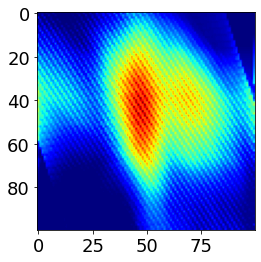

In [108]:
plt.imshow(np.sum(rec4,axis=0),cmap='jet')

In [118]:
recs = []
for i in range(1,19):
    recs.append(tomopy.recon(data[::i],angles[::i],algorithm='art'))

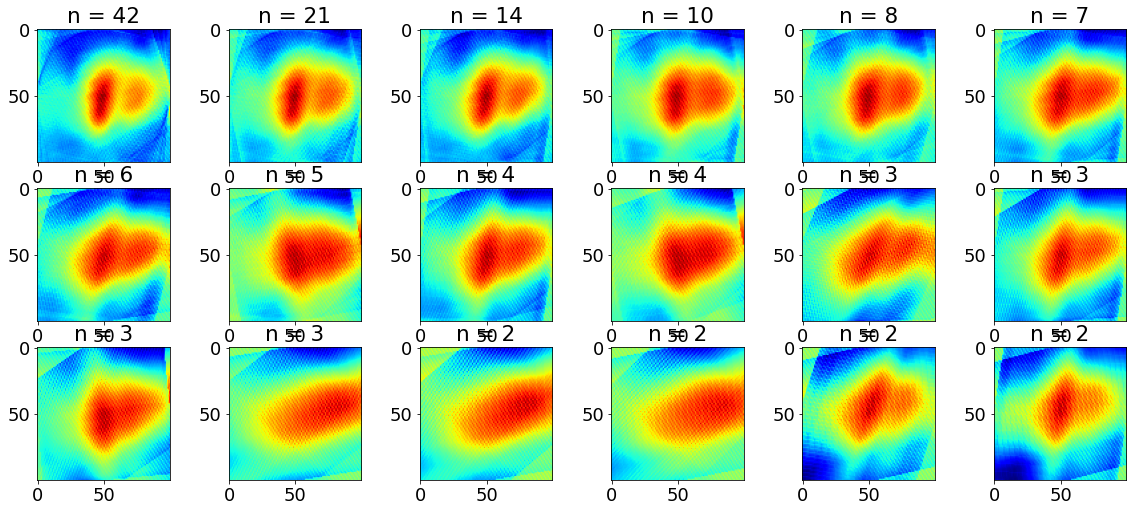

In [119]:
plt.figure(figsize=(20,20))
for i in range(18):
    plt.subplot(7,6,i+1)
    plt.imshow(np.sum(recs[i],axis=0),cmap='jet')
    plt.title(f'n = {42//(i+1)}')

In [26]:
recs2 = []
for i in range(1,10):
    recon = tomopy.recon(data,angles,algorithm='art',num_iter=i)
    recon[recon<0] = 0
    recs2.append(recon)

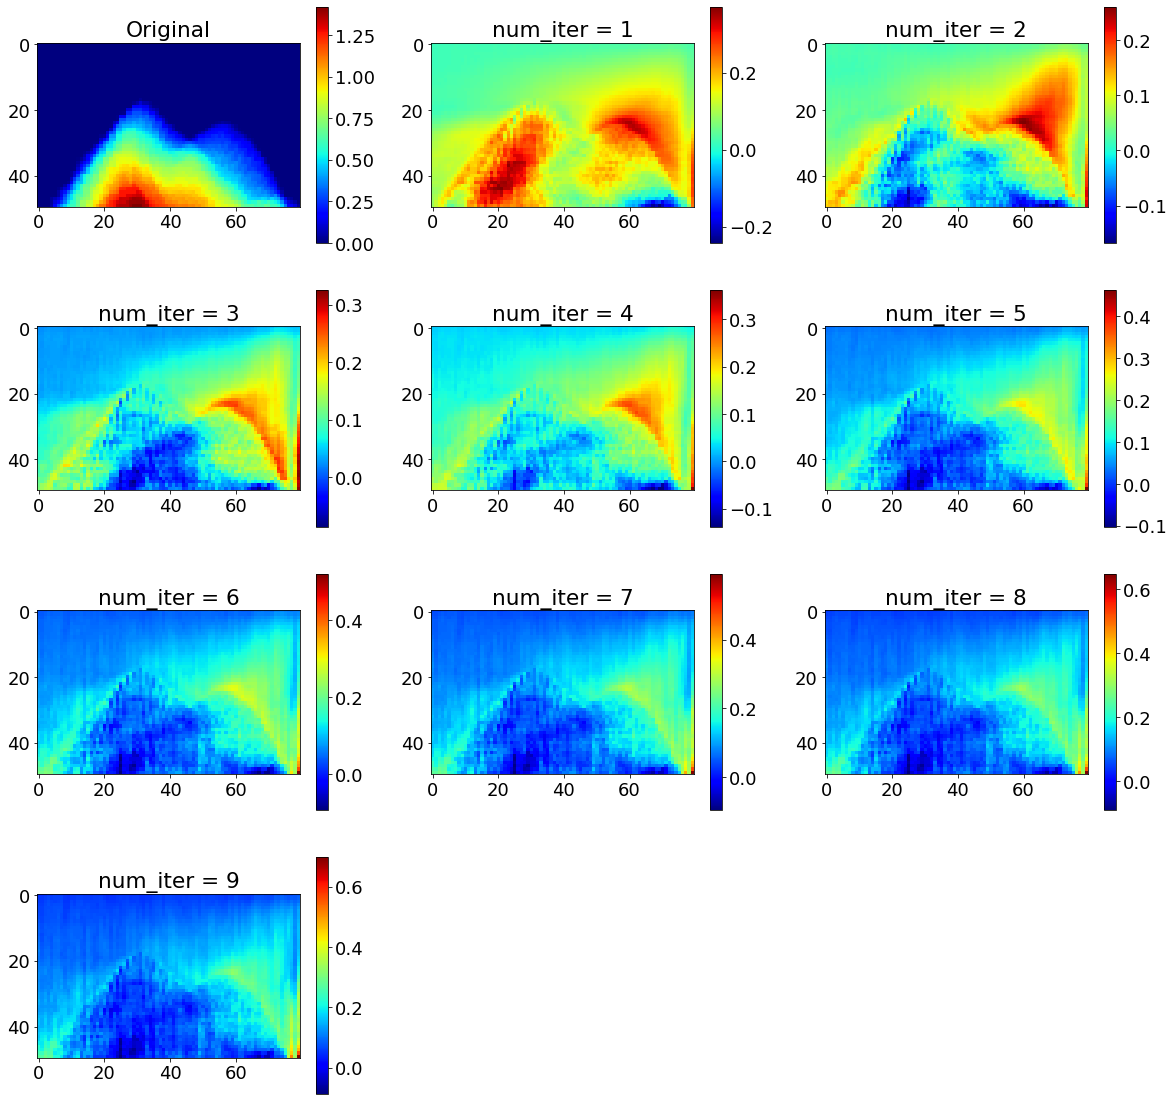

In [58]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.imshow(muogram0,cmap='jet')
plt.colorbar()
plt.title('Original')
for i in range(9):
    plt.subplot(4,3,i+2)
    plt.imshow((np.sum(recs2[i],axis=1)[50:,20:]/1000) - muogram0,cmap='jet')
    #plt.clim(0,np.max(muogram0))
    plt.colorbar()
    plt.title(f'num_iter = {i+1}')

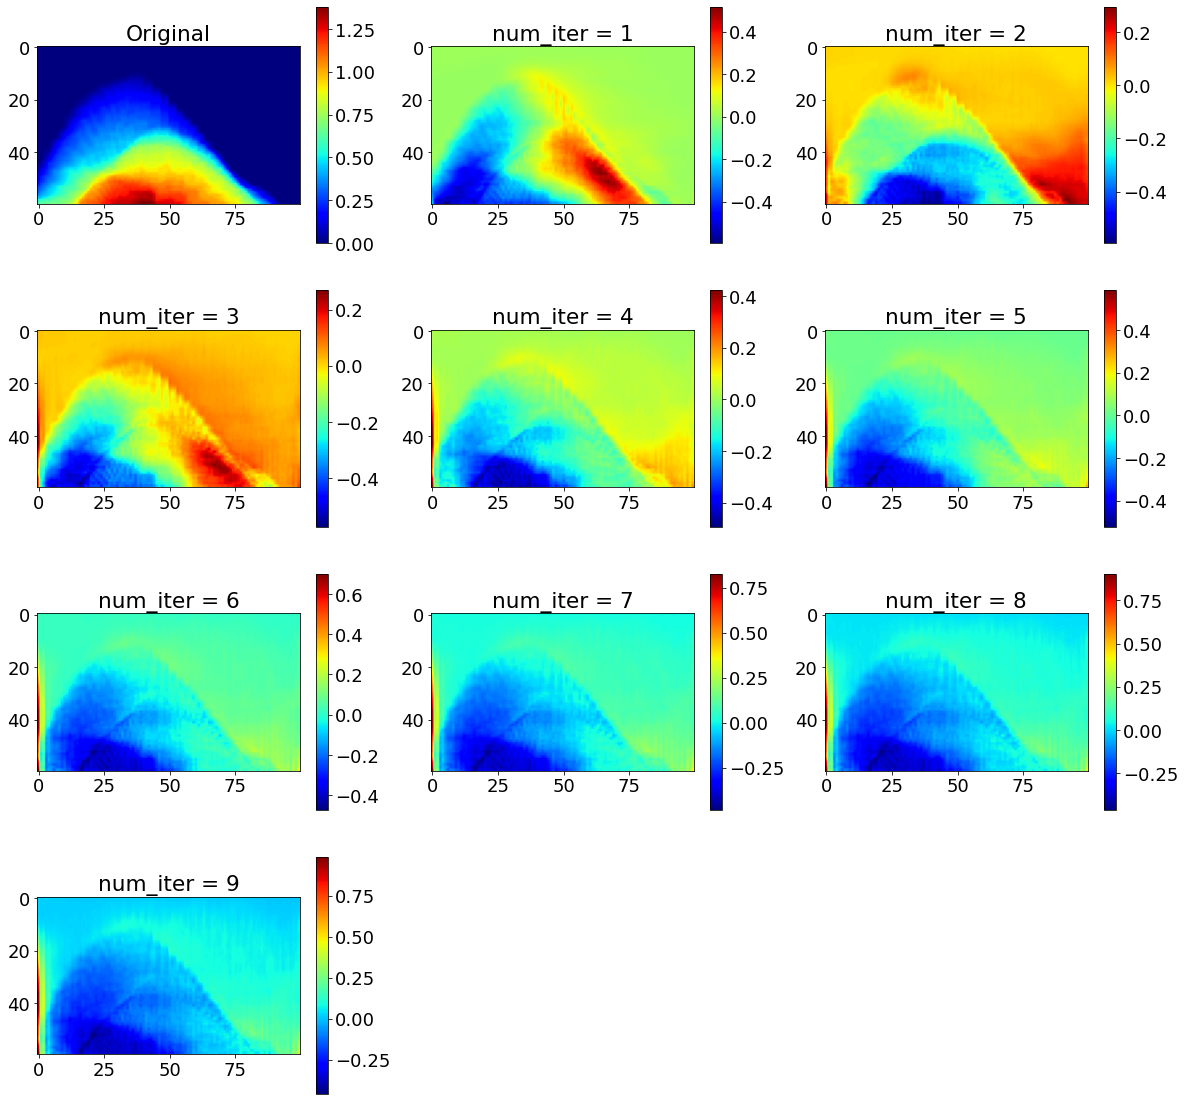

In [72]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.imshow(muogram90,cmap='jet')
plt.colorbar()
plt.title('Original')
for i in range(9):
    plt.subplot(4,3,i+2)
    recX = np.sum(recs2[i],axis=2)[40:]/1000
    plt.imshow((recX - muogram90),cmap='jet')
    #plt.clim(0,np.max(muogram90))
    plt.colorbar()
    plt.title(f'num_iter = {i+1}')

0.08743126852757628 0.09289039298417404
0.1281177397423663 0.1034003323990696
0.10698316805187053 0.10120422300324858
0.11507421723738835 0.09951494516034186
0.11967486787246281 0.1061488489413879
0.12357766291061191 0.10788982669087628
0.12905680490465474 0.11241554611503934
0.13285064675621908 0.11558860441646618
0.13735623674559896 0.11937294091436784


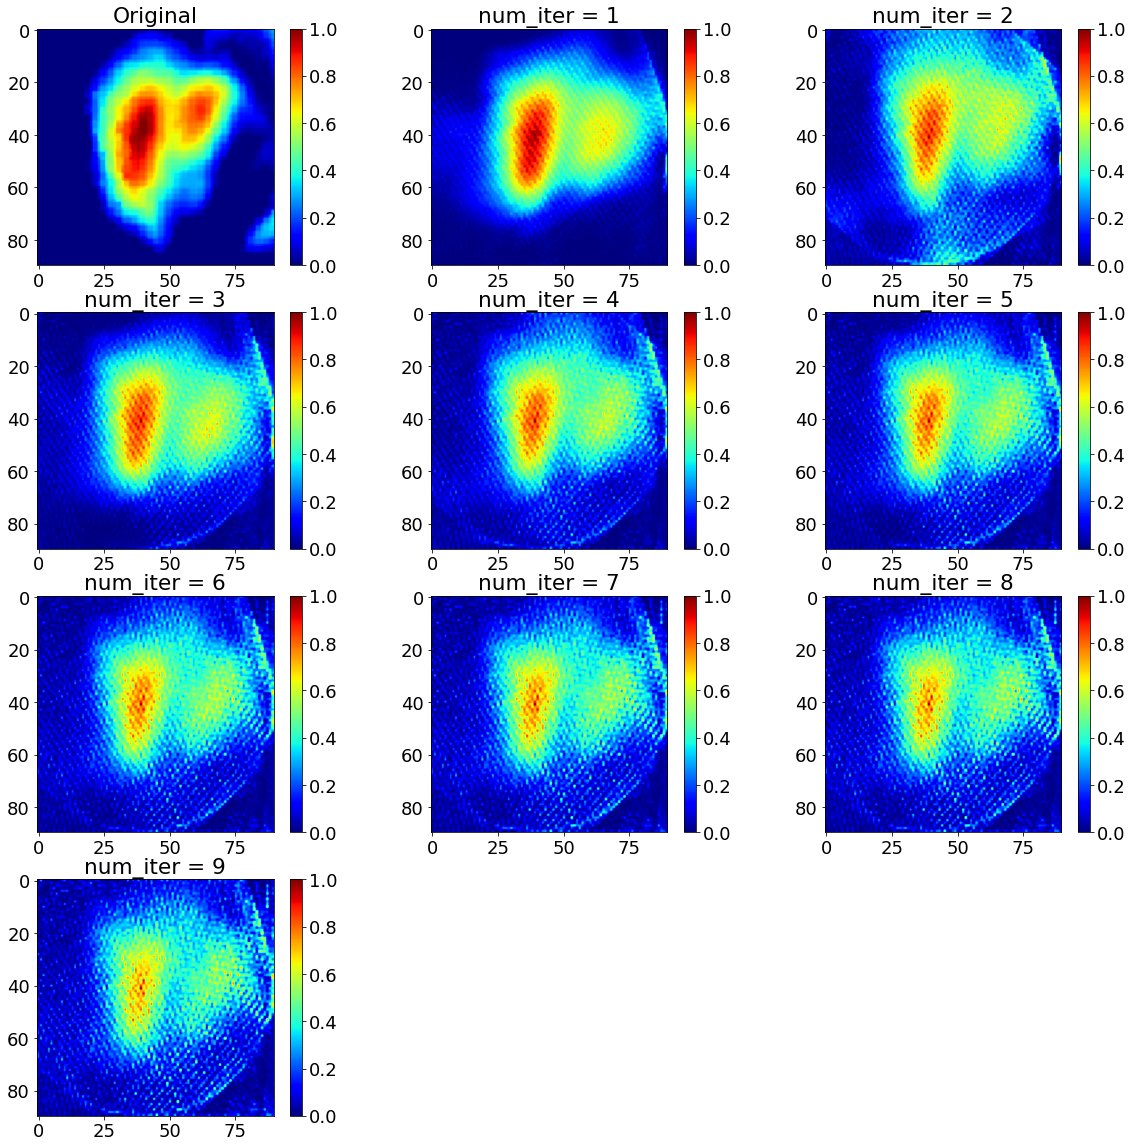

In [126]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.imshow(heightmap2[10:,10:],cmap='jet')
plt.colorbar()
plt.title('Original')
for i in range(9):
    recZ = np.sum(recs2[i],axis=0)[10:,10:]
    recZ_norm = (recZ - np.min(recZ)) / (np.max(recZ) - np.min(recZ)) # normalization between 0 and 1
    plt.subplot(4,3,i+2)
    plt.imshow((recZ_norm),cmap='jet')
    print(np.mean(abs(recZ_norm-heightmap2[10:,10:])),np.std(abs(recZ_norm-heightmap2[10:,10:])))
    #plt.clim(0,1)
    plt.colorbar()
    plt.title(f'num_iter = {i+1}')

In [110]:
recs4 = []
for i in range(1,10):
    recon = tomopy.recon([data[0],data[10],data[-4],data[-1]],angles4,algorithm='art', num_iter=i)
    recon[recon<0] = 0
    recs4.append(recon)

0.14250596370245497 0.12141749029163268
0.1332185078320005 0.10881989421706281
0.1330069022818404 0.10625994293425733
0.13444840285606263 0.10657432619256986
0.13620169740943922 0.10819992567348906
0.13798337656107737 0.11052413876342923
0.1385486072564861 0.1118104914150606
0.13681372121549096 0.11088107207579391
0.1375112852813831 0.11480603257321645


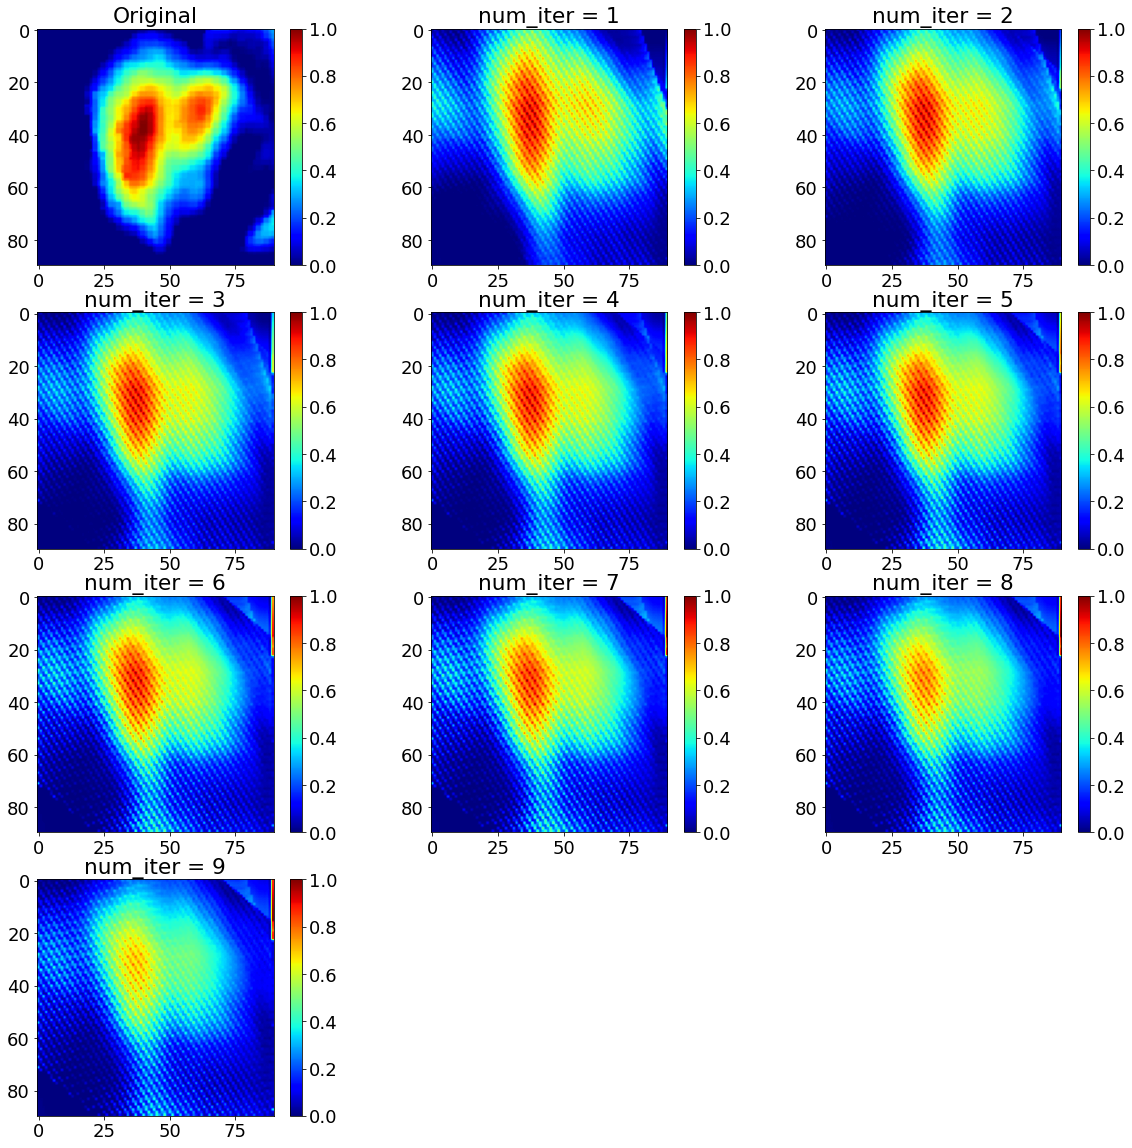

In [115]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.imshow(heightmap2[10:,10:],cmap='jet')
plt.colorbar()
plt.title('Original')
for i in range(9):
    recZ = np.sum(recs4[i],axis=0)[10:,10:]
    recZ_norm = (recZ - np.min(recZ)) / (np.max(recZ) - np.min(recZ)) # normalization between 0 and 1
    plt.subplot(4,3,i+2)
    plt.imshow((recZ_norm),cmap='jet')
    print(np.mean(abs(recZ_norm-heightmap2[10:,10:])),np.std(abs(recZ_norm-heightmap2[10:,10:])))
    #plt.clim(0,1)
    plt.colorbar()
    plt.title(f'num_iter = {i+1}')

In [124]:
recs10 = []
for i in range(1,10):
    recon = tomopy.recon(data[::4],angles[::4],algorithm='art', num_iter=i)
    recon[recon<0] = 0
    recs10.append(recon)

0.09898768619871634 0.11177480718871556
0.10931028938268801 0.10464317624981292
0.10878725659774627 0.11029591864495567
0.12279390268333706 0.11405560745526735
0.1323279114892253 0.12684798018787552
0.1400931112235892 0.13938701160424294
0.14605860456262584 0.14945889968600737
0.15088668806721844 0.15764405160073044
0.154923506810063 0.16424213740968385


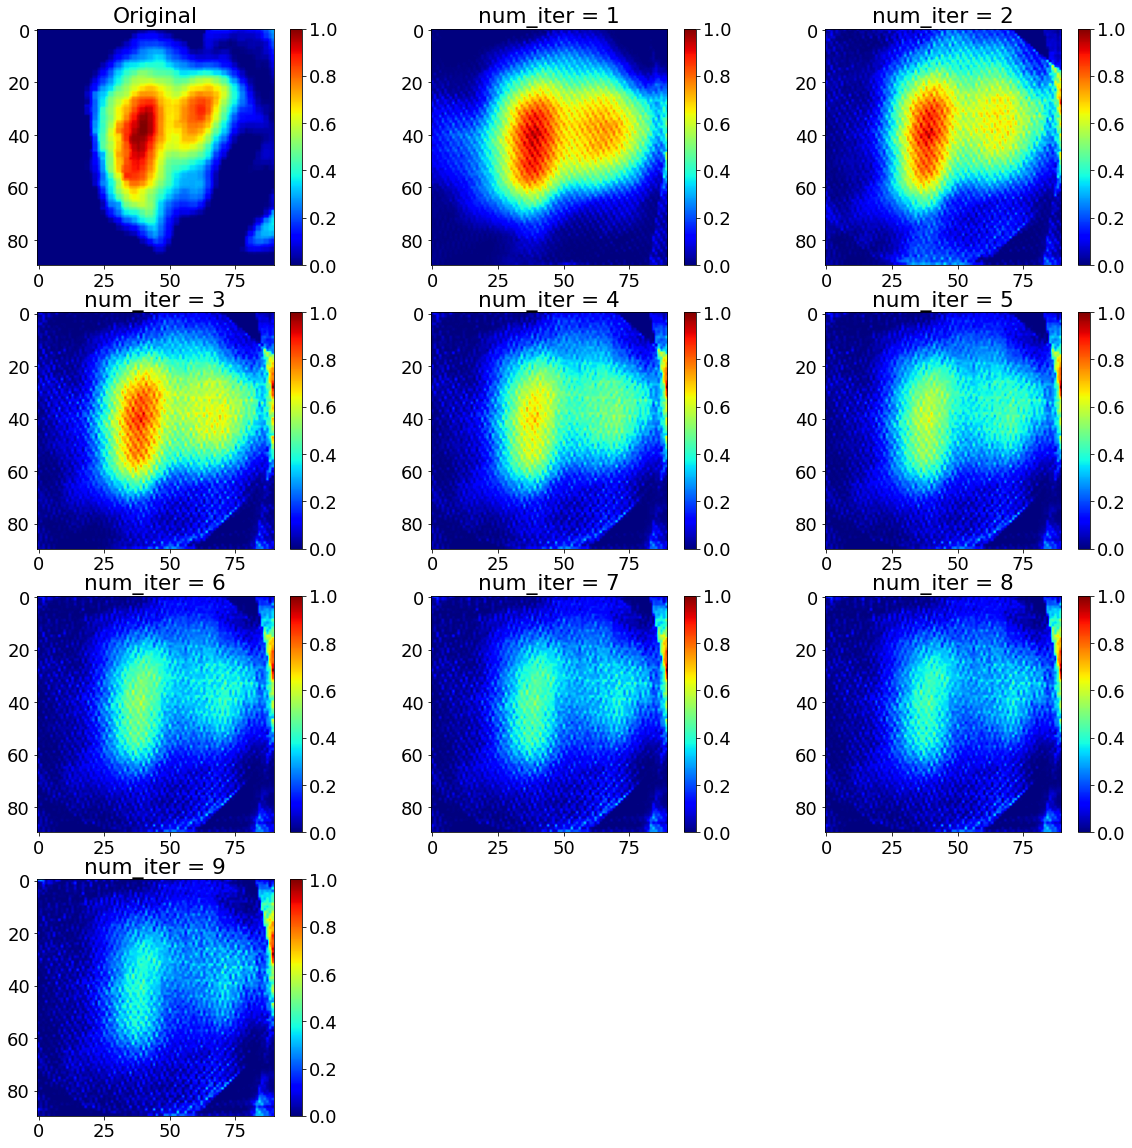

In [125]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.imshow(heightmap2[10:,10:],cmap='jet')
plt.colorbar()
plt.title('Original')
for i in range(9):
    recZ = np.sum(recs10[i],axis=0)[10:,10:]
    recZ_norm = (recZ - np.min(recZ)) / (np.max(recZ) - np.min(recZ)) # normalization between 0 and 1
    plt.subplot(4,3,i+2)
    plt.imshow((recZ_norm),cmap='jet')
    print(np.mean(abs(recZ_norm-heightmap2[10:,10:])),np.std(abs(recZ_norm-heightmap2[10:,10:])))
    #plt.clim(0,1)
    plt.colorbar()
    plt.title(f'num_iter = {i+1}')

In [139]:
recs08 = []
for i in range(1,10):
    recon = tomopy.recon(data[::5],angles[::5],algorithm='art', num_iter=i)
    recon[recon<0] = 0
    recs08.append(recon)

0.09244688292385529 0.10034396056052626
0.10174132077307245 0.0968169252868103
0.10080704619719003 0.10239977617431466
0.10822605876076383 0.10459223651921587
0.11585220707465241 0.1127436497803406
0.12355979843373877 0.12326885798670471
0.13032736081302507 0.13307943119002721
0.1361160469262891 0.14171696573496276
0.14120870319299061 0.14910430806011968


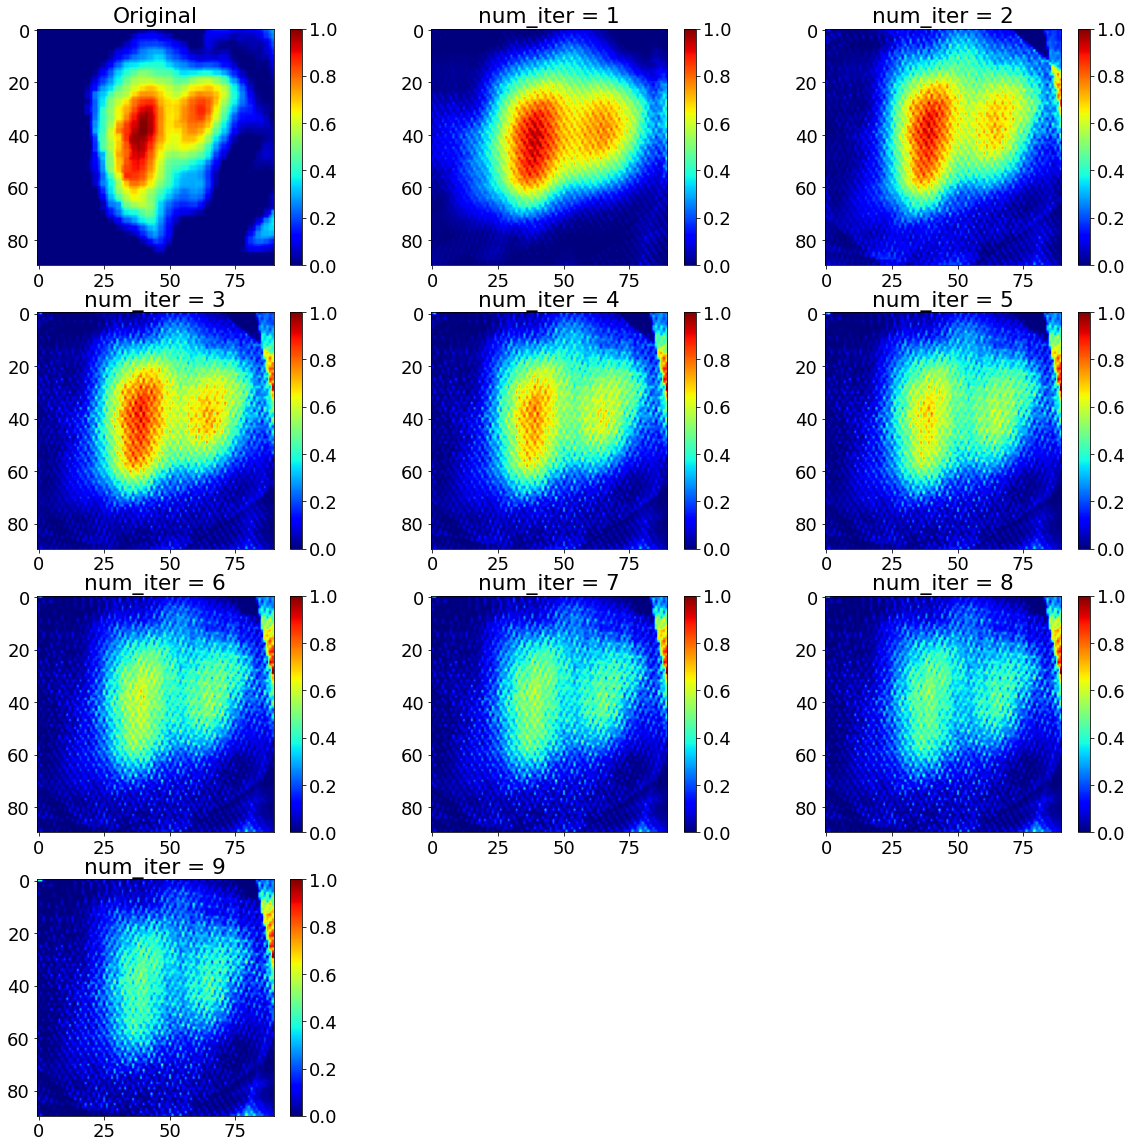

In [140]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.imshow(heightmap2[10:,10:],cmap='jet')
plt.colorbar()
plt.title('Original')
for i in range(9):
    recZ = np.sum(recs08[i],axis=0)[10:,10:]
    recZ_norm = (recZ - np.min(recZ)) / (np.max(recZ) - np.min(recZ)) # normalization between 0 and 1
    plt.subplot(4,3,i+2)
    plt.imshow((recZ_norm),cmap='jet')
    print(np.mean(abs(recZ_norm-heightmap2[10:,10:])),np.std(abs(recZ_norm-heightmap2[10:,10:])))
    #plt.clim(0,1)
    plt.colorbar()
    plt.title(f'num_iter = {i+1}')